In [86]:
import scipy
from scipy.io import wavfile
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
import osascript
from gtts import gTTS 
import os 
import pyaudio
import wave
import keyboard  # using module keyboard
import soundfile as sf
import math
import pyloudnorm as pyln
from sys import byteorder
from array import array
from struct import pack

# Extract data
for this part we extract the wave file as well as the meta data. the data file has two channels that we are going to clean up before we use. 

In [87]:
fs, data = wavfile.read('../LDC2002S28.wav')
number_of_samples = data.shape[0]
meta_data = open(r"LDC2002S28-txt.txt")
meta_data = pd.read_csv("LDC2002S28-txt.txt", sep="A:", header=None, engine='python')
meta_data.columns = ["sound limits","description"]

In [88]:
data = np.average(data, axis = 1)

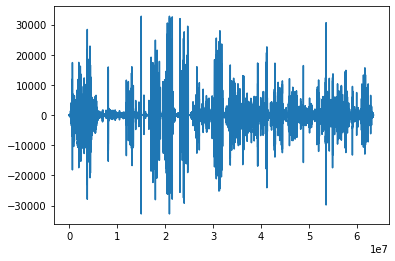

In [89]:
plt.plot(data)

# High pass filter
used a high pass filter to clean the noise from the dc signal setting the lowest frequeency possible to be 10 hz

In [90]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

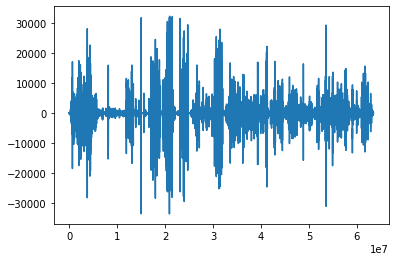

In [91]:
data = butter_highpass_filter(data, 10, fs)
plt.plot(data)

# remove additional data

In [92]:
meta_data = meta_data[meta_data.description != ' [MISC]']
meta_data = meta_data[~meta_data['description'].astype(str).str.startswith(' (')]

# divide the data

In [93]:
voice_time_limits = meta_data["sound limits"]
voice_time_limits = [i.split(" ")[0:2] for i in voice_time_limits]
voice_time_limits = np.array(voice_time_limits)
voice_time_limits = voice_time_limits.astype(np.float)
description = meta_data["description"]
description = [i.split(",")[0].strip() for i in description]

In [85]:
data

array([[-222, -207],
       [-213, -180],
       [-222, -204],
       ...,
       [   0,    0],
       [   0,    0],
       [   0,    0]], dtype=int16)

In [77]:
data_number = 0
divided_data = []
for i in voice_time_limits:
    startingpoint = int(i[0]*fs)
    endingpoint = int(i[1]*fs)
    divided_data.append(data[startingpoint:endingpoint])
    data_number +=1

np_data = np.asarray(divided_data)

In [82]:
divided_data = [np.mean(x) for x in divided_data]

[-0.14743675247876928,
 0.1463279189226711,
 -0.3820861678004535,
 -0.3946995464852608,
 0.17516045966409163,
 0.13659815261712574,
 0.2755291134302155,
 -0.1856638951877047,
 0.13660878447395303,
 -0.3152457739704063,
 -0.919732090367011,
 -0.03087584355271751,
 -0.24269643171031816,
 -0.07764000998585338,
 0.1407575375829344,
 -0.19889093439899422,
 -0.46518541102938377,
 -0.3844660510946524,
 0.27602223685172994,
 1.0523928818244643,
 137.36597270214236,
 1.6356439127375089,
 0.3768707482993197,
 0.06781137035819915,
 0.16791999379796885,
 2.1090768610588553,
 -0.24906539192253477,
 -0.40652557319223986,
 0.5492129218837294,
 -1.1183817442320845,
 -0.16160143711164118,
 -0.0053480511701535964,
 -0.2576466038531852,
 -0.19676816951865544,
 -0.3972823264670244,
 0.18732426303854877,
 0.07059712773998489,
 -0.08567285740729315,
 -0.1086734693877551,
 0.11086468975828558,
 0.15355596784168213,
 -0.1293920575257395,
 -0.3213475866537091,
 -0.019395824744199992,
 -0.3035459220111413,
 0.1

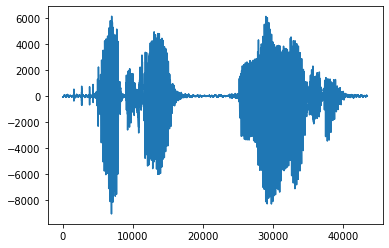

In [12]:
plt.plot(divided_data[1])

In [13]:
np.save("../segmented_voice_data",divided_data)


In [79]:
MFCC = []
for i in np_data:
    i = [float(x) for x in i]
    MFCC.append(librosa.feature.mfcc(y = i, sr = fs, n_mfcc =13))

TypeError: only size-1 arrays can be converted to Python scalars

In [80]:
np_data

array([array([[-75, -68],
       [-85, -80],
       [-86, -81],
       ...,
       [-45, -43],
       [-49, -47],
       [-53, -49]], dtype=int16),
       array([[-12, -13],
       [-14, -14],
       [-16, -16],
       ...,
       [ 87,  75],
       [ 92,  77],
       [ 96,  80]], dtype=int16),
       array([[ -2,   2],
       [ -7,  -3],
       [ -3,   1],
       ...,
       [-55, -32],
       [-50, -30],
       [-48, -31]], dtype=int16),
       array([[-28, -26],
       [-26, -23],
       [-21, -20],
       ...,
       [ 39,  22],
       [ 38,  22],
       [ 40,  23]], dtype=int16),
       array([[  5,   9],
       [  0,   3],
       [  5,   6],
       ...,
       [-21, -21],
       [-20, -18],
       [-16, -14]], dtype=int16),
       array([[ -8,  -3],
       [ -8,  -5],
       [-12,  -5],
       ...,
       [-85, -69],
       [-86, -68],
       [-86, -68]], dtype=int16),
       array([[ -5,   4],
       [ -1,   6],
       [  1,  11],
       ...,
       [-27, -16],
       [-30, -17]